In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_minst = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_minst.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_name =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

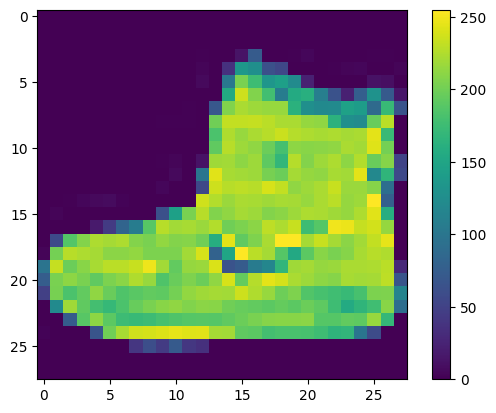

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images/255.0
test_images= test_images/255.0

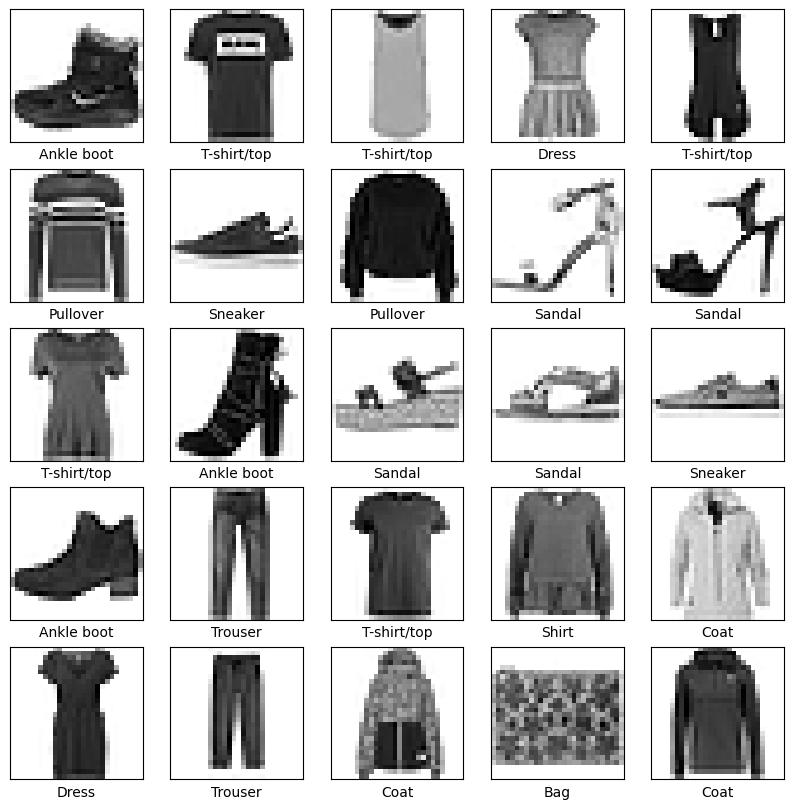

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs =30)

Epoch 1/30
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4945 - accuracy: 0.8263
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3755 - accuracy: 0.8655
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3392 - accuracy: 0.8781
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8864
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8912
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2813 - accuracy: 0.8953
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2700 - accuracy: 0.8998
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9035
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2501 - accuracy: 0.9070
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [13]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\n Test Accuracy:',test_acc)

313/313 - 1s - loss: 0.4135 - accuracy: 0.8854 - 636ms/epoch - 2ms/step

 Test Accuracy: 0.8853999972343445


In [16]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax() ])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [23]:
def plot_image(i,prediction_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid([False])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap= plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],100*np.max(prediction_array),class_name[true_label],color=color))

def plot_value_array(i,prediction_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),prediction_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

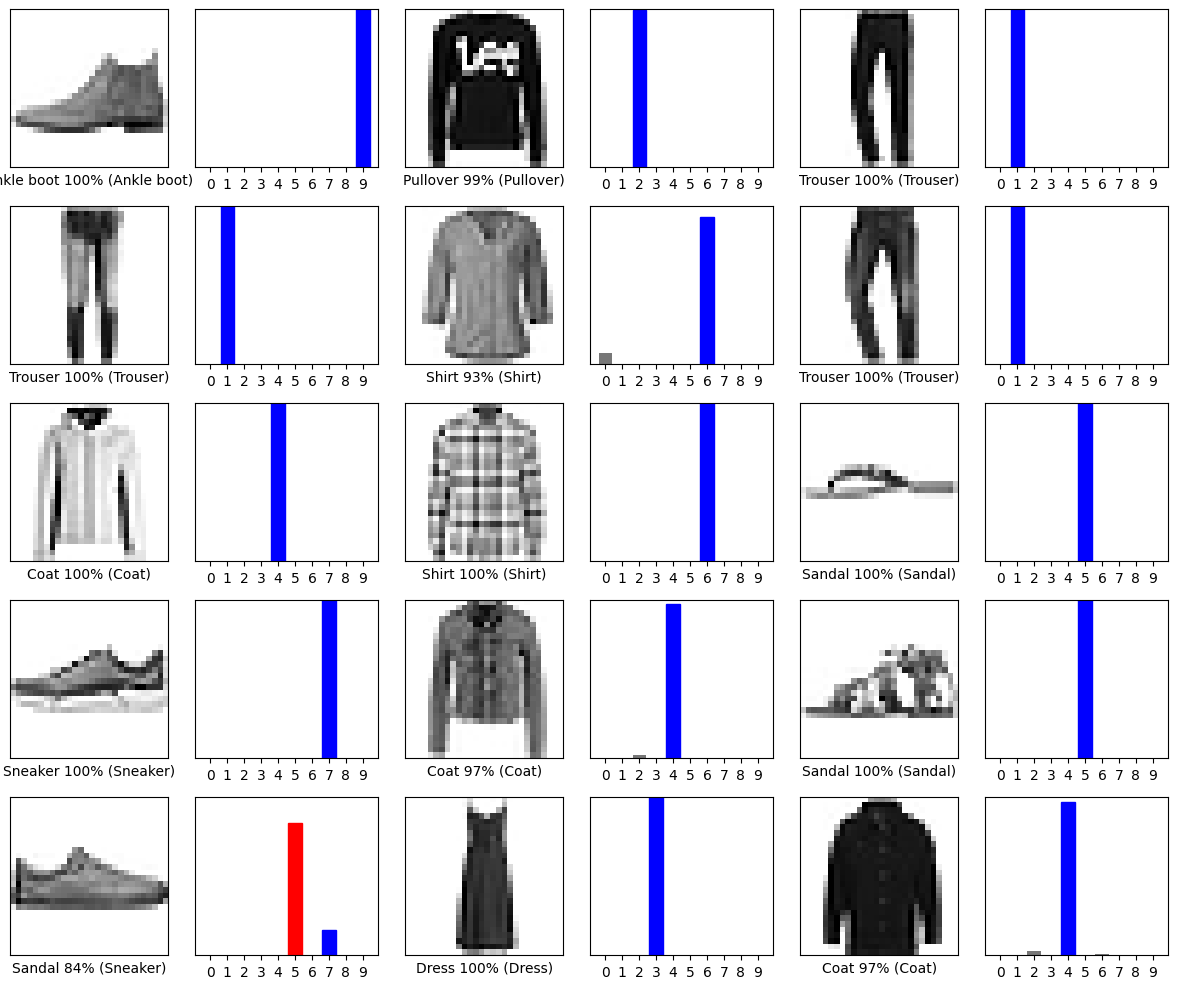

In [24]:
num_rows = 5
num_cols =3
num_images= num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()
